Το πρώτο βήμα είναι η εισαγωγή των modules που θα χρειαστούμε

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Αρχικά θα φορτώσουμε τα δεδομένα με την read_csv του pandas
Με την χρήση του head μπορούμε να διαβάσουμε τις πρώτες γραμμές των δεδομένων. Ώστε να έχουμε μια πρώτη εικόνα των δεδομένων μας. Όπου πρόκειται για τις πληροφορίες της κάθε χώρας για την θερμοκρασία της κάθε πόλης. Το πρώτο πράγμα που παρατηρούμε είναι οι ελλειπείς τιμές σε πολλές στήλες οπότε θα πρέπει στην συνέχεια να τις διαχειρηστούμε

In [3]:
data = pd.read_csv('weather_data.csv')

print(data.head(10))

       country capital        date  season  avg_temp_c  min_temp_c  \
0  Afghanistan   Kabul  1966-03-02  winter         7.1         NaN   
1  Afghanistan   Kabul  1966-03-28  spring         7.9         NaN   
2  Afghanistan   Kabul  1966-05-02  spring        18.8         NaN   
3  Afghanistan   Kabul  1966-05-04  spring        19.7         NaN   
4  Afghanistan   Kabul  1966-05-18  spring        24.6         NaN   
5  Afghanistan   Kabul  1966-06-08  spring        24.4         NaN   
6  Afghanistan   Kabul  1966-07-10  summer        26.5         NaN   
7  Afghanistan   Kabul  1966-07-17  summer        25.2         NaN   
8  Afghanistan   Kabul  1966-07-25  summer        27.2         NaN   
9  Afghanistan   Kabul  1966-07-29  summer        25.2         NaN   

   max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
0         NaN               NaN            NaN               NaN   
1         NaN               NaN            NaN               NaN   
2        22.2            

Παρατηρούμε πρώτα τις πρώτες 10 γραμμές των δεδομένων μας
Όπου περιέχονται τα στοχεία της πόλης Kabul 

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326654 entries, 0 to 3326653
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   country                 object 
 1   capital                 object 
 2   date                    object 
 3   season                  object 
 4   avg_temp_c              float64
 5   min_temp_c              float64
 6   max_temp_c              float64
 7   precipitation_mm        float64
 8   snow_depth_mm           float64
 9   avg_wind_dir_deg        float64
 10  avg_wind_speed_kmh      float64
 11  peak_wind_gust_kmh      float64
 12  avg_sea_level_pres_hpa  float64
 13  sunshine_total_min      float64
 14  region                  object 
dtypes: float64(10), object(5)
memory usage: 380.7+ MB
None


Με την χρήση της info() παίρνουμε την πληροφορία σχετικά με τον τύπο της κάθε στήλης. Παρατηρούμε αρκετές κατηγορικές μεταβλητές οι οποίες στην συνέχεια θα πρέπει να τις διαχειρηστούμε κατάλληλα.

In [5]:
print(data.describe())

         avg_temp_c    min_temp_c    max_temp_c  precipitation_mm  \
count  3.326654e+06  2.805836e+06  2.818224e+06      2.145828e+06   
mean   1.787362e+01  1.284672e+01  2.200725e+01      3.260506e+00   
std    1.100727e+01  1.091089e+01  1.168904e+01      1.234306e+01   
min   -4.780000e+01 -5.160000e+01 -3.920000e+01      0.000000e+00   
25%    1.090000e+01  5.400000e+00  1.450000e+01      0.000000e+00   
50%    2.080000e+01  1.440000e+01  2.520000e+01      0.000000e+00   
75%    2.680000e+01  2.250000e+01  3.100000e+01      1.800000e+00   
max    4.360000e+01  3.900000e+01  6.000000e+01      7.780000e+02   

       snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
count  257759.000000     729401.000000        1.064330e+06   
mean      215.070574        170.711583        1.305008e+01   
std       769.208975        107.546058        7.358508e+00   
min         0.000000          0.000000        0.000000e+00   
25%         0.000000         77.000000        7.800000e+00   
50%   

Με την χρήση του describe() παίρνουμε ενδιαφέρον στατιστικά για την κάθε στήλη του dataset.


Μετατροπή της στήλης date σε αντικέιμενο Date Time. 
Για την μετατροπή θα χρησιμοποιήσουμε την συνάρτηση to_datetime() του pandas
Με την χρήση της info() παρατηρούμε ότι ο τύπος έχει μετατραπεί σε datetime

In [6]:
data['date'] = pd.to_datetime(data['date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326654 entries, 0 to 3326653
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   country                 object        
 1   capital                 object        
 2   date                    datetime64[ns]
 3   season                  object        
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
 14  region                  object        
dtypes: datetime64[ns](1), float64(10), object(4)
memory usage: 380.7+ MB
None


Ελλειπες τιμές

Θα χρησιμοποιήσουμε την συνάρτηση isnull() του pandas ώστε να πάρουμε το σύνολο των ελειπών τιμών ανά στήλη του dataset

In [7]:
print(data.isnull().sum())

country                         0
capital                         0
date                            0
season                          0
avg_temp_c                      0
min_temp_c                 520818
max_temp_c                 508430
precipitation_mm          1180826
snow_depth_mm             3068895
avg_wind_dir_deg          2597253
avg_wind_speed_kmh        2262324
peak_wind_gust_kmh        3205438
avg_sea_level_pres_hpa    2599095
sunshine_total_min        3247137
region                     124616
dtype: int64


Παρατηρούμε ότι υπάρχουν ελειπές τιμές στα δεδομένα μας. 
Για την οπτικοποίηση των ελειπών τιμών θα χρησιμοποιήσουμε την missingno βιβλιοθήκη 

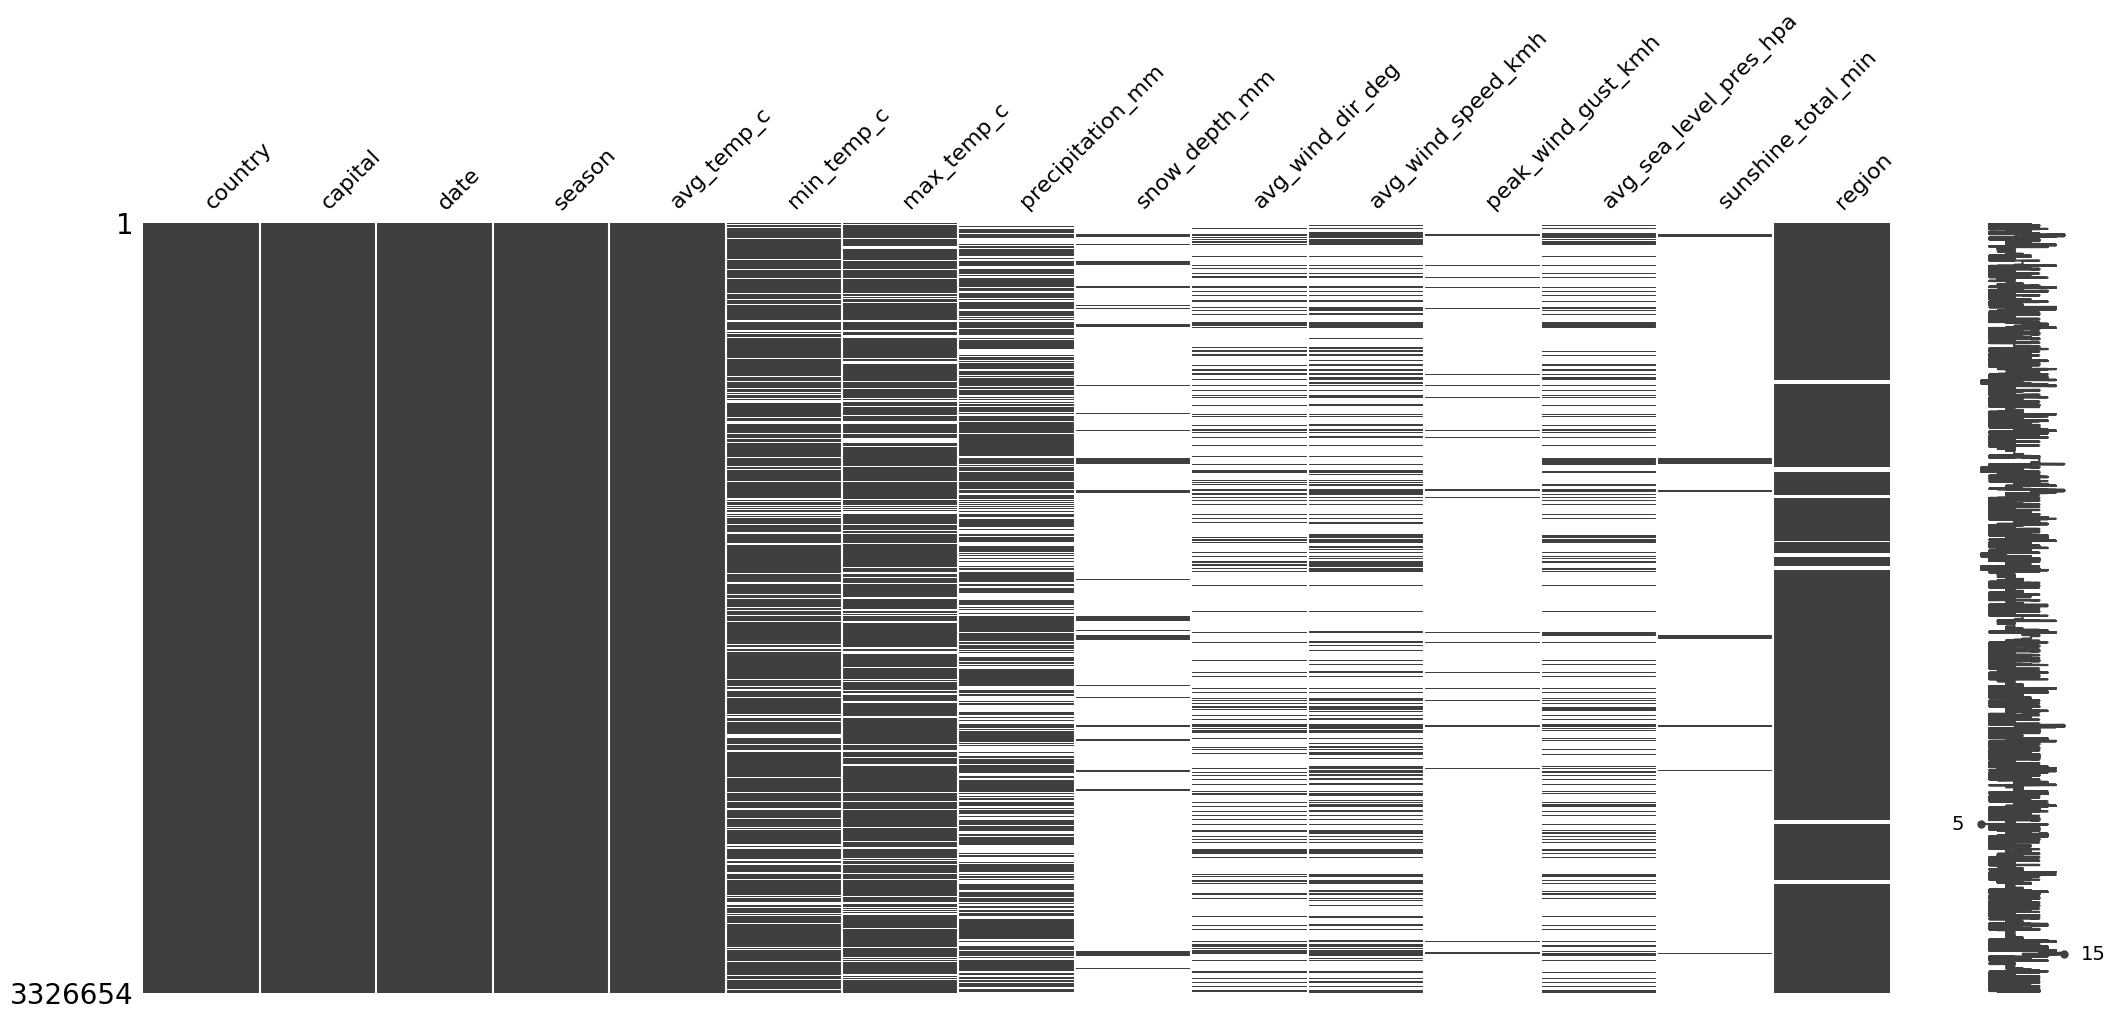

In [68]:
msno.matrix(data)
plt.show()

Μέσα από το παραπάνω γράφημα καταλαβαίνουμε τις ελλειπές τιμές ανα στήλη. Οι στήλες country, capital , date , season, avg_temp_c δεν έχουν καμία ελλειπή τιμή ενώ όλες οι υπόλοπες έχουν ελλειπες τιμές. Μέσα από το γράφημα γίνεται φανερό ότι η στήλη sunshine_total_min διαθέτει ελάχιστη πληροφορία καθώς το μεγαλύτερο μέρος είναι κενό μόνο σε λίγες περιπτώσεις διαθέτει πληροφορία.

Επίσης στο παρακάτω γράφημα με την χρήση του df.isna().sum().plot(kind='bar') παρατηρούμε το σύνολο των ελλειπών ανά κατηγορία.

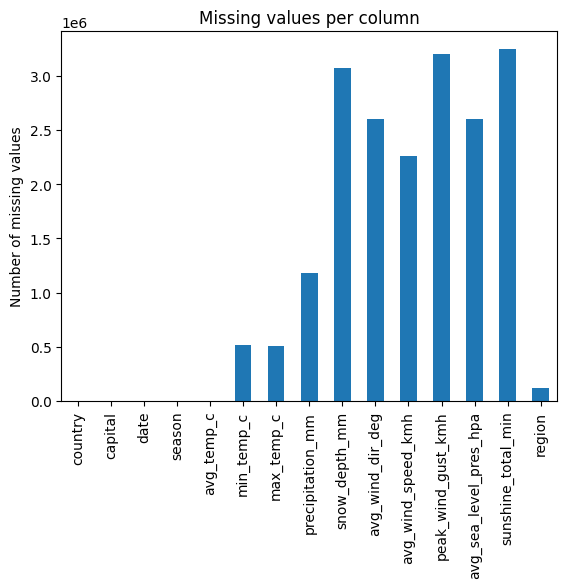

In [8]:
data.isna().sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing values per column')
plt.show()

Συμπερασματικά οι ελλειπές τιμές παρατηρούντε στις
- min_temp_c
- max_temp_c
- precipitation_mm
- snow_depth_mm
- avg_wind_dir_deg
- avg_wind_speed_kmh
- peak_wind_gust_kmh
- avg_sea_level_pres_hpa
- sunshine_total_min
- region


Εξαιτείας του μεγάλου ποσοστού των ελλειπών τιμών από δεν αξίζει να κάνουμε imputation στις παρακάτω μεταβλητές: 
- precipitation_mm
- snow_depth_mm
- avg_wind_dir_deg
- avg_wind_speed_kmh
- peak_wind_gust_kmh
- avg_sea_level_pres_hpa
- sunshine_total_min


Σχετικά με την κατηγορία region επειδή είναι μια κατηγορική μεταβλητή δεν μπορεί να γίνει imputation καθώς είναι μια από τις κατηγορίες όπου δεν επιδέχεται τέτοιες μετατροπές καθώς μια πόλη μπορεί να ανήκει μόνο σε ένα region

Το πρώτα βήμα είναι να κάνουμε drop() τις παραπάνω στήλες:


In [9]:
df = data.drop(columns=['precipitation_mm','snow_depth_mm','avg_wind_dir_deg', 'avg_wind_speed_kmh','peak_wind_gust_kmh','avg_sea_level_pres_hpa','sunshine_total_min','region'])
print(df.isnull().sum())

country            0
capital            0
date               0
season             0
avg_temp_c         0
min_temp_c    520818
max_temp_c    508430
dtype: int64


Χρησιμοποιούμε την συνάρτηση len() ώστε να πάρουμε την πληροφορία σχετικά με το σύνολο των αριθμών των γραμμών του dataset

In [10]:
rows = len(df.axes[0])
print("Number of Rows: ", rows)

Number of Rows:  3326654


Για να αποφασίσουμε για τον τρόπο που θα γίνει το imputation για τις μεταβλητές min_temp & max_temp θα χρησιμοποιήσουμε τις συναρτήσεις mean & median του pandas ώστε να υπολογίσουμε και τις δύο περιπτώσεις για κάθε μεταβλητή.

In [11]:
mean_min_temp = df['min_temp_c'].mean()
median_min_temp = df['min_temp_c'].median()
mean_max_temp = df['max_temp_c'].mean()
median_max_temp = df['max_temp_c'].median()

print("Mean Min Temp:", mean_min_temp)
print("Median Min Temp:", median_min_temp)
print("Mean Max Temp:", mean_max_temp)
print("Median Max Temp:", median_max_temp)

Mean Min Temp: 12.846716985597155
Median Min Temp: 14.4
Mean Max Temp: 22.00724828828367
Median Max Temp: 25.2


Όπως φαίνεται από τα παραπάνω δεδομένα θα χρησιμοποιήσυμε το median και για τα δυο cases καθώς είναι λιγότερο ευαίσθητος στα ακραίες τιμές (outliers) τα οποία μπορούν να χαλάσουν το mean.

Χρησιμοποιύμε τις συναρτήσεις head ώστε να πάρουμε μια εικόνα από τα δεδομένα μας.
Την συνάρτηση isnull() ώστε να βεβαιώσουμε ότι δεν έχουμε καμία ελλειπείς τιμή στο dataset μας.

Για να το υλοποιήσουμε θα χρησιμοποιήσουμε το παρακάτω:

In [12]:
df_median = df.copy()

df_median['min_temp_c']=df_median['min_temp_c'].replace(np.nan , df['min_temp_c'].median())
df_median['max_temp_c']=df_median['max_temp_c'].replace(np.nan , df['max_temp_c'].median())

print(df_median.head(10))
print(df_median.isnull().sum())
print(df_median.columns)


       country capital       date  season  avg_temp_c  min_temp_c  max_temp_c
0  Afghanistan   Kabul 1966-03-02  winter         7.1        14.4        25.2
1  Afghanistan   Kabul 1966-03-28  spring         7.9        14.4        25.2
2  Afghanistan   Kabul 1966-05-02  spring        18.8        14.4        22.2
3  Afghanistan   Kabul 1966-05-04  spring        19.7        14.4        27.2
4  Afghanistan   Kabul 1966-05-18  spring        24.6        14.4        25.2
5  Afghanistan   Kabul 1966-06-08  spring        24.4        14.4        25.2
6  Afghanistan   Kabul 1966-07-10  summer        26.5        14.4        25.2
7  Afghanistan   Kabul 1966-07-17  summer        25.2        14.4        30.0
8  Afghanistan   Kabul 1966-07-25  summer        27.2        14.4        25.2
9  Afghanistan   Kabul 1966-07-29  summer        25.2        14.4        36.1
country       0
capital       0
date          0
season        0
avg_temp_c    0
min_temp_c    0
max_temp_c    0
dtype: int64
Index(['country',

Έτσι όλες οι ελλιπείς τιμές έχουν εξαφανιστεί από το dataset μας

Δημιυργία Ιστογράμματος 

Για να δημιούργησουμε το ιστόγραμμα κάθε χαρακτηριστικού θα χρησιμοποιήσουμε την συνάρτηση histplot() της seaborn. 

Χρησιμοποιούμε μια loop for ώστε να δημιουργηθεί ένα ιστόγραμμα για το κάθε χαρακτηριστικό

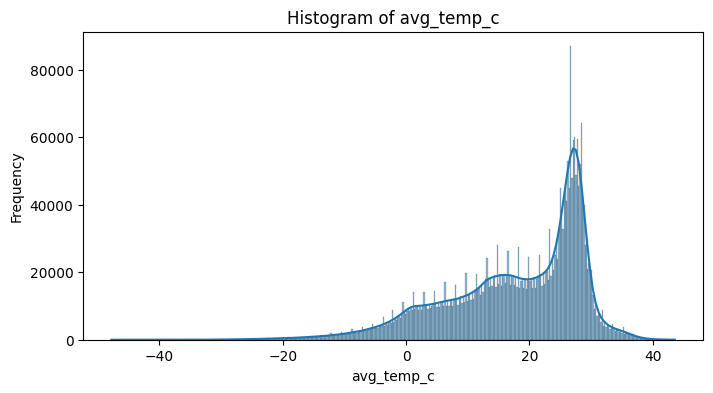

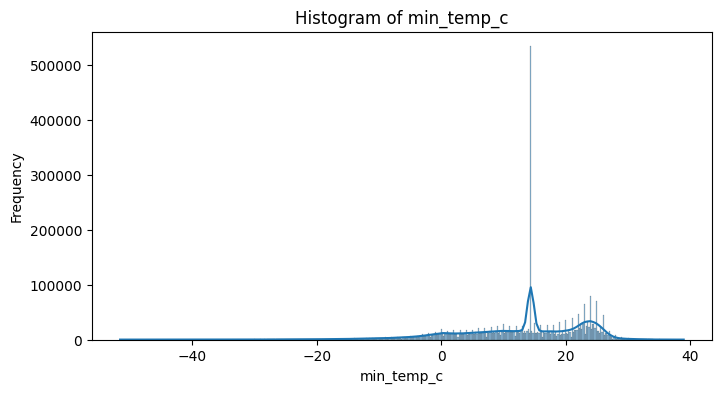

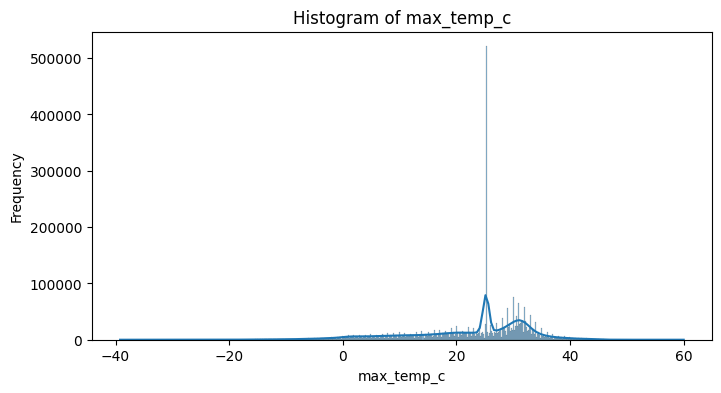

In [17]:
for column in df_median.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 4))
    sns.histplot(df_median[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Διαγράμματα Κατανομής

Ακολουθούν τα διαγράμματα κατανομής σε σχέση με την στήλη που θέλουμε να προβλέψουμε, δηλαδή την μέση θερμοκρασία κάθε πόλης. 

Το πρώτο διάγραμμα έχει την πληροφορία της χώρας σε σχέση με την μέση θερμοκρασία.

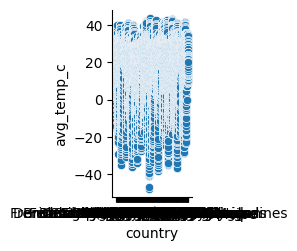

In [75]:
target_column = 'avg_temp_c'

# Crete the pairplot
sns.pairplot(df_median, y_vars=[target_column], x_vars='country')
plt.show()

Το πρώτο διάγραμμα έχει την πληροφορία της πόλης σε σχέση με την μέση θερμοκρασία.

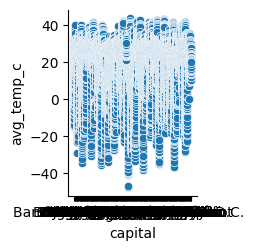

In [76]:
sns.pairplot(df_median, y_vars=[target_column], x_vars='capital')
plt.show()

Το πρώτο διάγραμμα έχει την πληροφορία της εποχής σε σχέση με την μέση θερμοκρασία.

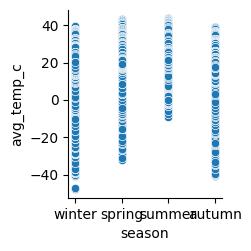

In [77]:
sns.pairplot(df_median, y_vars=[target_column], x_vars='season')
plt.show()

Το πρώτο διάγραμμα έχει την πληροφορία της πόλης σε ημερομηνίας με την μέση θερμοκρασία.

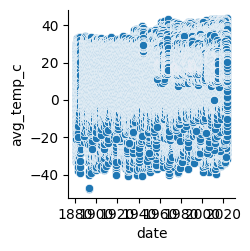

In [78]:
sns.pairplot(df_median, y_vars=[target_column], x_vars='date')
plt.show()

Το πρώτο διάγραμμα έχει την πληροφορία της ελάχιστης θερμοκρασίας σε σχέση με την μέση θερμοκρασία.

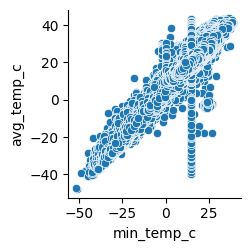

In [79]:
sns.pairplot(df_median, y_vars=[target_column], x_vars='min_temp_c')
plt.show()

Το πρώτο διάγραμμα έχει την πληροφορία της μέγιστης θερμοκρασίας σε σχέση με την μέση θερμοκρασία.

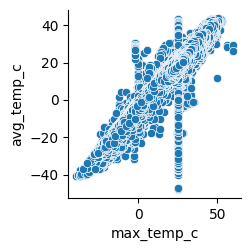

In [80]:
sns.pairplot(df_median, y_vars=[target_column], x_vars='max_temp_c')
plt.show()

Κατηγορικές Μεταβλητές

Οι κατηγορικές μεταβλητές των δεδομένων είναι οι παρακάτω:
- season
- capital
- country

Η κατηγορική μεταβλητή του season παίρνει τις τιμές των τεσσάρων εποχών έτσι μπορούμε να χρησιμοποιούμε το 'one-hot encoding' στο οποίο δημιουργούμε μία μεταβλητή για κάθε τιμή της κατηγορικής μας μεταβλητής

In [13]:
print(df_median.columns)

df_median['winter'] = (df_median['season'] == 'winter').astype(int)
df_median['spring'] = (df_median['season'] == 'spring').astype(int)
df_median['summer'] = (df_median['season'] == 'summer').astype(int)
df_median['autumn'] = (df_median['season'] == 'autumn').astype(int)

df_median.drop("season", axis=1, inplace=True)

print(df_median.head())


Index(['country', 'capital', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c'],
      dtype='object')
       country capital       date  avg_temp_c  min_temp_c  max_temp_c  winter  \
0  Afghanistan   Kabul 1966-03-02         7.1        14.4        25.2       1   
1  Afghanistan   Kabul 1966-03-28         7.9        14.4        25.2       0   
2  Afghanistan   Kabul 1966-05-02        18.8        14.4        22.2       0   
3  Afghanistan   Kabul 1966-05-04        19.7        14.4        27.2       0   
4  Afghanistan   Kabul 1966-05-18        24.6        14.4        25.2       0   

   spring  summer  autumn  
0       0       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  


In [14]:

df_new = df_median.copy()
df_new.drop('country', axis=1, inplace=True)
df_new.drop('date', axis=1, inplace=True)
print(df_new.columns)

Index(['capital', 'avg_temp_c', 'min_temp_c', 'max_temp_c', 'winter', 'spring',
       'summer', 'autumn'],
      dtype='object')


Υπολογισμός των 5 πιο ζεστών πόλεων 

Για τον υπολογισμό θα χρησιμοποιήσουμε την βιβλιοθήκη του pandas.
Επειδή υπάρχουν πολλαπλές μετρήσεις για κάθε πόλη πρώτα θα υπολογιστεί η μέση θερμοκρασία για κάθε πόλη με την χρήση των groupby ώστε να πάρουμε κάθε πόλη ξεχωριστά και έπειτα να υπολογίσουμε το μέσο τους όρο.

Στην συνεχεία θα γίνει ταξινόμηση με την sort_values() και θα ξεκινήσουμε από την μεγαλύτερη τιμή προς τη μικρότερη ώστε να λάβουμε το αποτέλεσμα που θέλουμε.

In [15]:
city_avg_temperatures = df_new.groupby('capital')['avg_temp_c'].mean().reset_index()
five_warmest_cities = city_avg_temperatures.sort_values(by='avg_temp_c', ascending=False).head(5)
print(five_warmest_cities)

        capital  avg_temp_c
133      Niamey   30.566517
89     Khartoum   30.311523
135  Nouakchott   29.760304
121   Mogadishu   29.506609
111        Malé   29.420282


Άρα οι πέντε πιο θερμές πόλεις είναι οι:
- Niamey  
- Khartoum
- Nouakchott
- Mogadishu
- Malé

Πίνακας συσχέτισης

Για τον πίνακα συσχέτισης θα πρέπει να εφαρμόσουμε το label encoding της στήλης με τα ονόματα των πόλεων, συγκεκριμένα τη κλάση LabelEncoder του sklearn, η οποία θα κωδικοποιήσει την κάθε πόλη με έναν αριθμό. 
Για παράδειγμα, Kabul = 87 , Buenos Aires 41 κτλ.

In [16]:
label_encoder = LabelEncoder()


df_new['country_encoded'] = label_encoder.fit_transform(df_new['capital'])
encoded_df  = df_new.drop('capital', axis=1)
print(encoded_df.head())

   avg_temp_c  min_temp_c  max_temp_c  winter  spring  summer  autumn  \
0         7.1        14.4        25.2       1       0       0       0   
1         7.9        14.4        25.2       0       1       0       0   
2        18.8        14.4        22.2       0       1       0       0   
3        19.7        14.4        27.2       0       1       0       0   
4        24.6        14.4        25.2       0       1       0       0   

   country_encoded  
0               87  
1               87  
2               87  
3               87  
4               87  


Για τον υπολογισμό της ετεροσυσχέτισης μεταξύ των χαρακτηριστικών θα γίνει χρήση της συνάρτησης corr() ώστε να υπολογιστεί ο πίνακας συσχέτισης των χαρακτηριστικών του dataframe.
Για την οπιτκοποίηση του πίνακα θα χρησιμοποιήσουμε το heatmap() της searborn.

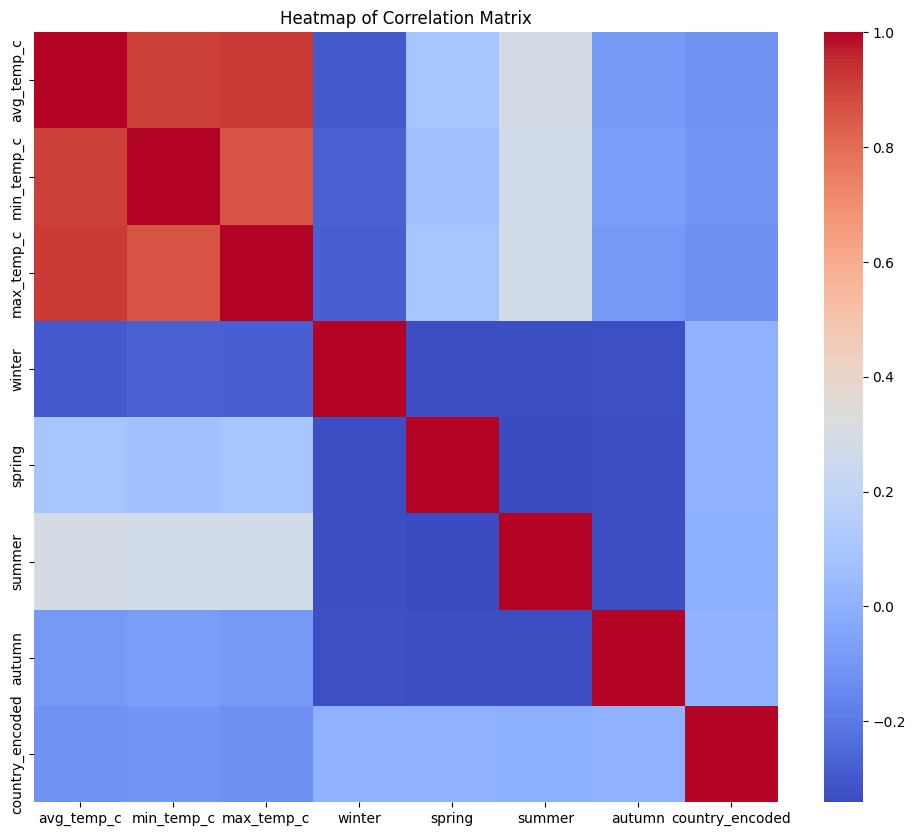

In [17]:
correlation_matrix = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Χωρισμός των δεδομένων σε 2 dataframes

Μετατρέπουμε τα pandas dataframes σε numpy arrays και χωρίζουμε τον πίνακα σχεδιασμού από την εξαρτημένη μεταβλητή (τη μεταβλητή στόχο, y)
Τα δεδομένα Χ δεν περιέχουν την μεταβλητή της μέσης θερμοκρασίας καθώς κάνουμε drop την συγκεκριμένη μεταβλητή.

In [16]:
X = encoded_df.drop('avg_temp_c', axis=1).values
y = encoded_df['avg_temp_c'].values

print(X.shape)
print(y.shape)
print(X[0,:])


(3326654, 7)
(3326654,)
[14.4 25.2  1.   0.   0.   0.  87. ]


Ανάπτυξη Μοντέλων Πρόβλεψης

Διαχωρισμός του συνόλου εκπαίδευσης και δοκιμής
Για τον διαχωρισμό θα χρησιμοποιηθεί η συνάρτηση train_test_split() του scikit-learn
Επιλέγεται 70% για το σύνολο εκπαίδευσης και 30% για το σύνολο δοκιμής

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (2328657, 7)
Test set size: (997997, 7)


Τυποποίηση των δεδομένων

Για την τυποποιήση των δεδομένων εκπαίδευσης και δοκιμής, θα χρησιμοποιήηθεί ο StandardScaler της scikit-learn. Η τυποποίηση είναι σημαντική διαδικασία για πολλούς αλγορίθμους μηχανικής μάθησης, καθώς βοηθά στην καλύτερη απόδοση και σύγκλιση των μοντέλων, εξασφαλίζοντας ότι οι μεταβλητές έχουν μέση τιμή μηδέν και τυπική απόκλιση 1.

Θα εφαρμόσουμε τον scaler στο σύνολο εκπαίδευσης και στο σύνολο δοκιμής

In [18]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

print("Mean of X_train_sc:", np.mean(X_train_sc, axis=0))
print("Standard deviation of X_train_sc:", np.std(X_train_sc, axis=0))
print("Mean of X_test_sc:", np.mean(X_test_sc, axis=0))
print("Standard deviation of X_test_sc:", np.std(X_test_sc, axis=0))

Mean of X_train_sc: [ 8.30518621e-12 -1.23417974e-11 -9.67164578e-15 -5.37751260e-15
  5.74025138e-15  6.90594558e-15  1.41529947e-16]
Standard deviation of X_train_sc: [1. 1. 1. 1. 1. 1. 1.]
Mean of X_test_sc: [ 0.00100316  0.00053946  0.00090573  0.00113684 -0.00151574 -0.00052069
 -0.00204052]
Standard deviation of X_test_sc: [0.99961359 0.99969883 1.00053367 1.00064324 0.9991455  0.99969225
 0.99967679]


Ανάπτυξη μοντέλου γραμμικού μοντέλου LinearRegression και εκτύπωση των αποτελεσμάτων του.

In [19]:
# Try linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
print(f'MSE = {mse}')
print(f'MAE = {mae}')


print(f'Mean(train) = {np.mean(y_train)}')
print(f'Mean(test) = {np.mean(y_test)}')

MSE = 12.452138480143608
MAE = 1.8875056818978087
Mean(train) = 17.87076276154023
Mean(test) = 17.88028841770066


Ανάπτυξη του μοντέλου Random Forest

In [20]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("Mean Absolute Error:", rf_mae)

Mean Squared Error: 1.920439317785836
R-squared: 0.9841421201938546
Mean Absolute Error: 0.8411301417828442


Οι μετρικές δείχνουν ότι το μοντέλο Random Forest λειτουργεί εξαιρετικά καλά για το συγκεκριμένο πρόβλημα. Το μοντέλο είναι σε θέση να προβλέψει με μεγάλη ακρίβεια και συνέπεια τις τιμές της εξαρτημένης μεταβλητής, καθώς υπάρχει υψηλή συσχέτιση μεταξύ των προβλεπόμενων και των πραγματικών τιμών.

Πιο αναλυτικά φαίνεται ότι ο Random Forest εμφάνισε πολύ χαμηλότερο Mean Squared Error (MSE) και Mean Absolute Error (MAE) σε σύγκριση με το γραμμικό μοντέλο. Αυτό υποδηλώνει ότι το Random Forest προέβλεψε τις τιμές με μεγαλύτερη ακρίβεια και συνέπεια.
Η τιμή R-squared για το Random Forest ήταν εξαιρετικά υψηλή (περίπου 0.984), πράγμα που υποδεικνύει ότι το μοντέλο είναι ικανό να εξηγήσει σχεδόν όλη την μεταβλητότητα των δεδομένων με μεγάλη ακρίβεια